Example for HRTEM image simulation of SrTiO$_3$ along the [001] zone axis

In [1]:
# Import necesary packages 
import numpy as np
import matplotlib.pyplot as plt
import drprobe as drp
%matplotlib inline

In [16]:
# Read lattice parameters from cel file
a, b, c = np.genfromtxt('SrTiO3_001_ref.cel', skip_header=1, skip_footer=1, usecols=(1, 2, 3))[0]

In [4]:
# Set up phase gratings
nx, ny = 40, 40
nz = 2
drp.commands.celslc(cel_file='SrTiO3_001_ref.cel', # location of cel file
                    slice_name='slc/STO', # target file names
                    nx=nx,        # number of sampling points along x
                    ny=ny,        # number of sampling points along y
                    nz=nz,         # number of sampling points along z
                    ht=300,       # high tension
                    absorb=True,  # apply absorptive form factors
                    dwf=True,     # apply Debye-Waller factors
                    output=True,  # Command line output (prints executed command)
                    pot=True      # Saves potentials
                   )

Performed celslc with the following command:
 celslc -cel SrTiO3_001_ref.cel  -slc slc/STO -nx 40 -ny 40 -nz 2 -ht 300 -dwf -abs -pot

 +---------------------------------------------------+
 | Program [celslc]                                  |
 | Version: 0.70b 64-bit  -  2018 Nov  28            |
 | Author : Dr. J. Barthel, ju.barthel@fz-juelich.de |
 |          Forschungszentrum Juelich GmbH, GERMANY  |
 | License: GNU GPL 3 <http://www.gnu.org/licenses/> |
 +---------------------------------------------------+


Creating 2 equidistant slices of the super-cell.
Using Debye-Waller factors.
Using absorption potentials.
Exporting potentials to files *.pot.
Output in slice files are phase gratings.
Sorting slices in default order from z/c=0 to z/c=1.
Input structure parameter file: CEL format (default).
Input electron energy: 300.00 keV
Input electron wavelength: 1.9687 pm
Interaction constant: 0.41120E-02 (eV nm)^(-1) (2pi m0 e / h^2 * lambda)
Using atomic form factors of Weickenmeier 

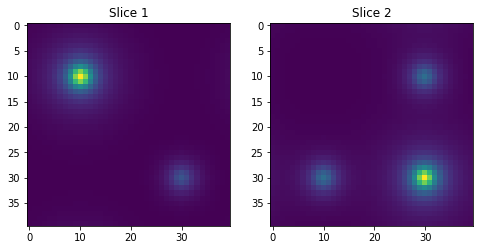

In [12]:
# Display potentials
slc_1 = np.fromfile('slc/STO_001.pot', dtype='complex64').reshape((nx, ny))
slc_2 = np.fromfile('slc/STO_002.pot', dtype='complex64').reshape((nx, ny))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(np.real(slc_1))
axs[1].imshow(np.real(slc_2))
axs[0].set_title('Slice 1')
axs[1].set_title('Slice 2');

In [21]:
# Create Parameter file for multislice
msa = drp.msaprm.MsaPrm()

# Setup (fundamental) MSA parameters
msa.wavelength = 0.00197  # wavelength (in nm) for 300 keV electrons
msa.h_scan_frame_size = a 
msa.v_scan_frame_size = b 
msa.scan_columns = nx
msa.scan_rows = ny
msa.tilt_x = 1 # object tilt along x in degree
msa.slice_files = 'slc/STO' # location of phase gratings
msa.number_of_slices = 2 # Number of slices in phase gratings
msa.det_readout_period = 2 # Readout after every 2 slices
msa.tot_number_of_slices = 10 # Corresponds to 5 layers / unit cells of SrTiO3


# Save prm file
msa.save_msa_prm('msa.prm')

In [25]:
# Execute multislice
drp.commands.msa(prm_file='msa.prm', 
                 output_file='wav/STO.wav',
                 ctem=True, # Flag for conventional TEM simulation (otherwise calculates STEM images)
                 output=True)

Performed msa with the following command:
 msa -prm msa.prm -out wav/STO.wav /ctem

 +---------------------------------------------------+
 | Program: [msa] MultiSlice Algorithm               |
 | Version: 0.93b 64-bit  -  2019 Apr  10  -         |
 | Author : Dr. J. Barthel, ju.barthel@fz-juelich.de |
 |          Forschungszentrum Juelich GmbH, GERMANY  |
 | License: GNU GPL 3 <http://www.gnu.org/licenses/> |
 +---------------------------------------------------+


Loading parameter file.
Begin of multislice calculations.
End of multislice calculations.





In [44]:
# Create Parameter file for wavimg
wavimg = drp.WavimgPrm()
sl = 2 # Perform simulation for slice # 2

# Setup (fundamental) MSA parameters
wavimg.high_tension = 300
wavimg.mtf = (0, 0, '') 
wavimg.oa_radius = 25 # Apply objective aperture [mrad]
wavimg.vibration = (1, 0.016, 0.016, 0) # Apply isotropic image spread of 16 pm rms displacement
wavimg.spat_coherence = (1, 0.4) # Apply spatial coherence
wavimg.wave_sampling = (a / nx, b / ny)
wavimg.wave_files = 'wav/STO_sl{:03d}.wav'.format(sl)
wavimg.wave_dim = (nx, ny)

wavimg.aberrations_dict = {1: (1, 0)} # apply defocus of 1 nm

wavimg.output_files = 'img/STO_sl{:03d}.dat'.format(sl) # Simulate for slice number "sl"
wavimg.output_format = 0
wavimg.flag_spec_frame = 1
wavimg.output_dim = (nx, ny)
wavimg.output_sampling = (a / nx, b / ny)

# Save wavimg Parameter file
wavimg.save_wavimg_prm('wavimg.prm')

In [45]:
# Execute wavimg
drp.commands.wavimg('wavimg.prm', output=True)

Performed wavimg with the following command:
 wavimg -prm wavimg.prm

 +---------------------------------------------------+
 | Program: [wavimg]                                 |
 | Version: 0.70b 64-bit  -  2018 Sept 14  -         |
 | Author : Dr. J. Barthel, ju.barthel@fz-juelich.de |
 |          Forschungszentrum Juelich GmbH, GERMANY  |
 | License: GNU GPL 3 <http://www.gnu.org/licenses/> |
 +---------------------------------------------------+


Loading parameters from file [wavimg.prm].
Finished loading parameters.
- internal array size:   128
Parameters checked successfully.
Loading wave function data from file [wav/STO_sl002.wav].
Creating TEM image from wave.
Image calculation by explicit focal integration.
0-----------------------------------------------------------1
************************************************************* 
Extracting image frame data.
Applying envelopes to image data.
Saving image data to file [img/STO_sl002.dat].
Data format: 32-bit float
Finished al

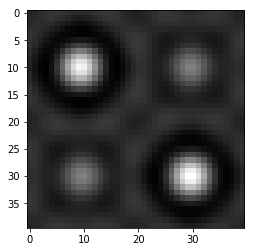

In [46]:
# Display simulated HRTEM image
img = np.fromfile('img/STO_sl002.dat', dtype='float32').reshape((nx, ny))
plt.imshow(img, cmap='gray');